In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
#inspecting the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
#inspecting data values
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#checking for missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#dataset stats
df.describe(include = "all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
#number of unique values of each column
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

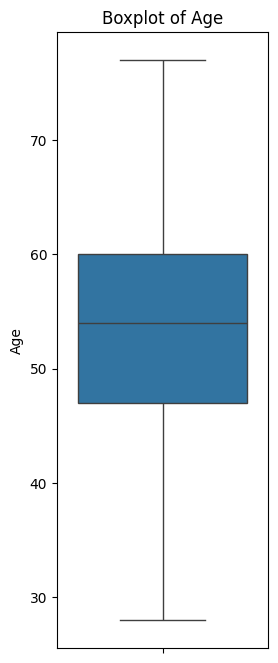

In [ ]:
#using boxplots to find outliers
plt.figure(figsize=(6, 8))
plt.subplot(1,2,1)
sns.boxplot(y=df["Age"])
plt.title("Boxplot of Age")

plt.show()

In [ ]:
df["HeartDisease"].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df["ChestPainType"].value_counts()


,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
df["RestingECG"].value_counts()


,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df["ST_Slope"].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


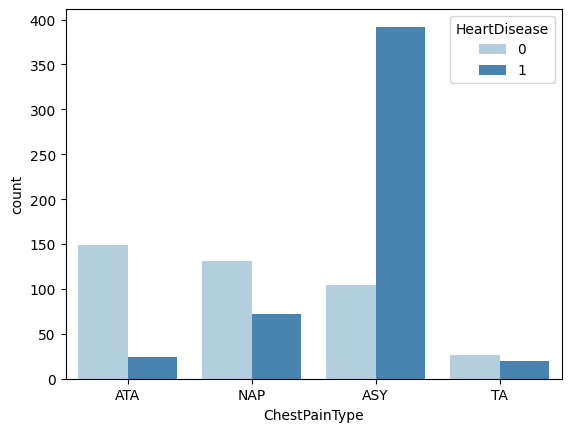

In [ ]:
sns.countplot(x="ChestPainType", data=df, hue="HeartDisease",palette = "Blues")
plt.show()

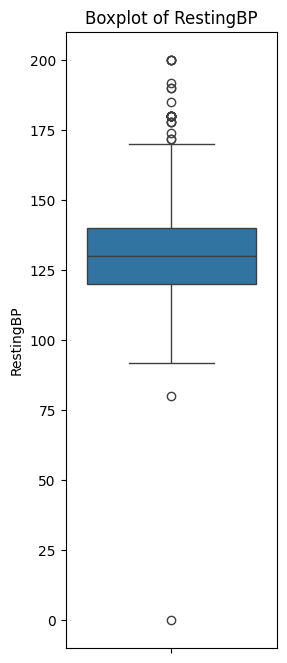

In [ ]:
#using boxplots to find outliers
plt.figure(figsize=(6, 8))
plt.subplot(1,2,1)
sns.boxplot(y=df["RestingBP"])
plt.title("Boxplot of RestingBP")

plt.show()

In [ ]:
df[df['RestingBP']== 0].value_counts()
df = df[df['RestingBP']!= 0]

In [ ]:
df[df['Cholesterol'] == 0].value_counts()

,,,,,,,,,,,,count
Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,
32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,1
34,M,ASY,115,0,1,Normal,154,N,0.2,Up,1,1
35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1,1
36,M,ASY,110,0,1,Normal,125,Y,1.0,Flat,1,1
38,F,ASY,105,0,1,Normal,166,N,2.8,Up,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
70,M,ASY,140,0,1,Normal,157,Y,2.0,Flat,1,1
72,M,NAP,160,0,0,LVH,114,N,1.6,Flat,0,1
73,F,NAP,160,0,0,ST,121,N,0.0,Up,1,1


In [ ]:
#replacing cholesterol values of 0 with my median

df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
median_cholesterol = df['Cholesterol'].median()
df['Cholesterol'].fillna(median_cholesterol, inplace=True)

<ipython-input-106-1355d2eb6ff2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
<ipython-input-106-1355d2eb6ff2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(median_cholesterol, inplace=True)
<ipython

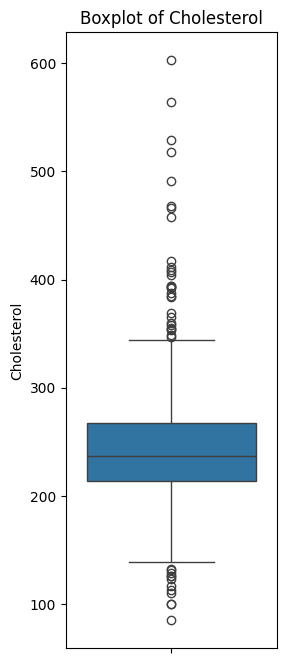

In [ ]:
#using boxplots to find outliers
plt.figure(figsize=(6, 8))
plt.subplot(1,2,1)
sns.boxplot(y=df["Cholesterol"])
plt.title("Boxplot of Cholesterol")

plt.show()

In [ ]:
#checking for Oldpeak values that are less than 0
df[df['Oldpeak'] < 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,237.0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,237.0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,237.0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,237.0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,237.0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,237.0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,237.0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,237.0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,237.0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,237.0,1,Normal,72,Y,-0.5,Flat,1


In [ ]:
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = np.nan
df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace=True)

<ipython-input-109-a1c8d3edf462>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace=True)


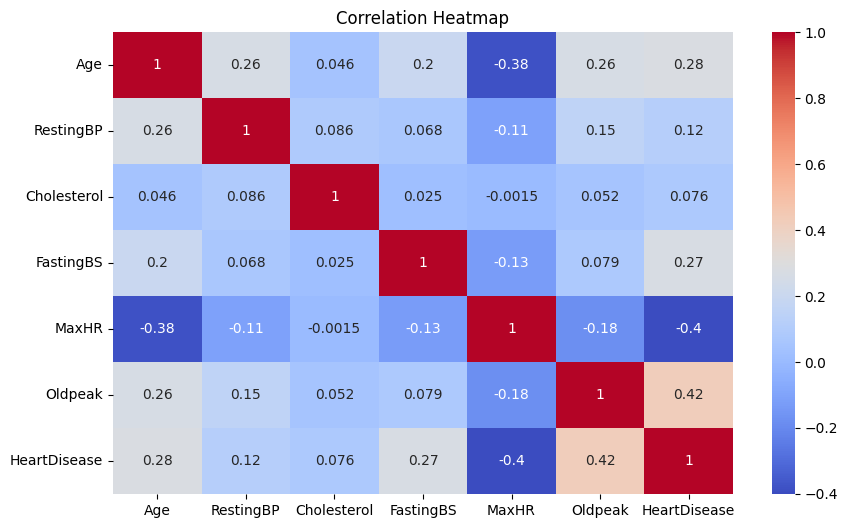

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

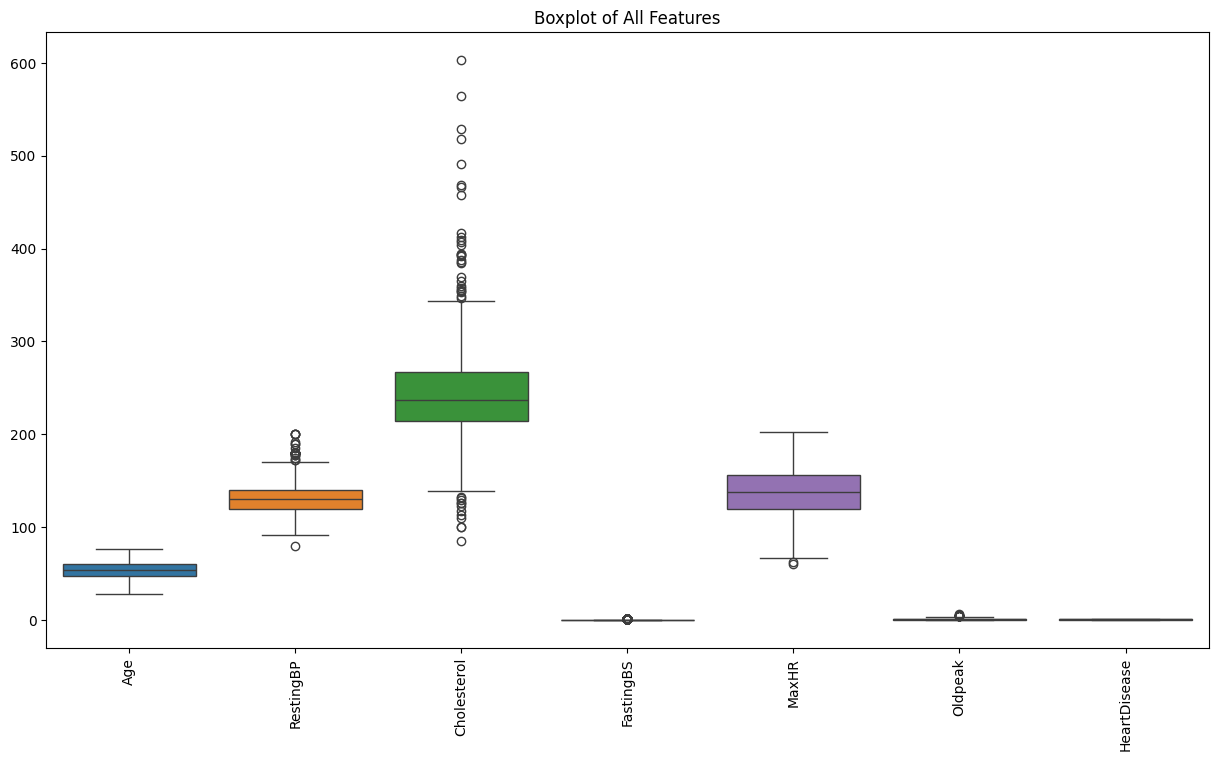

In [ ]:
#using boxplots to find outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of All Features")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Heart distribution')

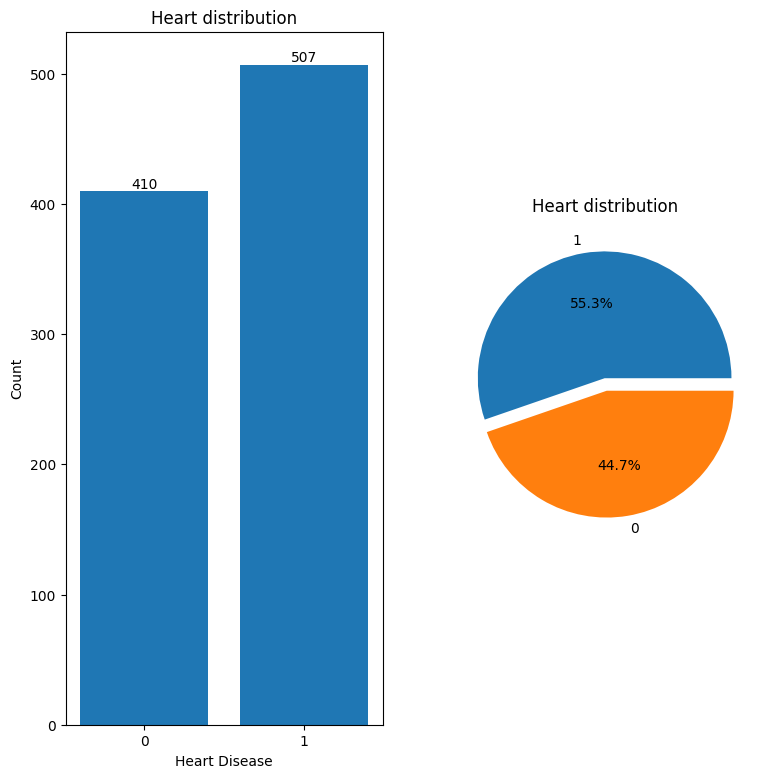

In [ ]:
hd_count = df["HeartDisease"].value_counts()
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
bar = plt.bar(hd_count.index, hd_count.values)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Heart distribution")
plt.bar_label(bar, fontsize=10)


plt.subplot(1,2,2)
plt.pie(hd_count, labels=hd_count.index, autopct='%1.1f%%', explode=(0,0.1))
plt.title("Heart distribution")

Text(0.5, 1.0, 'Sex distribution')

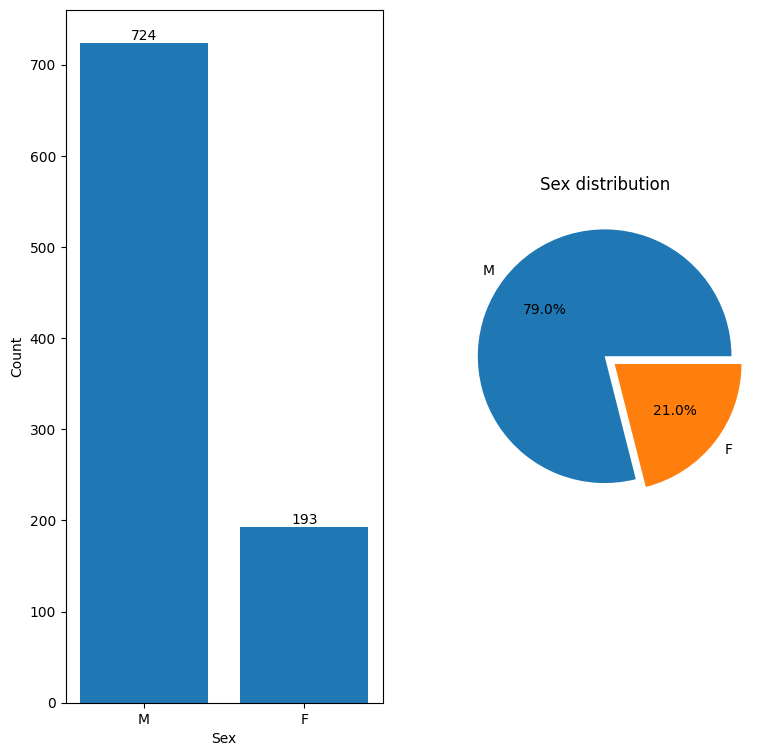

In [ ]:
sex_count = df["Sex"].value_counts()
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
bar = plt.bar(sex_count.index, sex_count.values)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.bar_label(bar, fontsize=10)


plt.subplot(1,2,2)
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', explode=(0,0.1))
plt.title("Sex distribution")

Text(0.5, 1.0, 'FastingBS distribution')

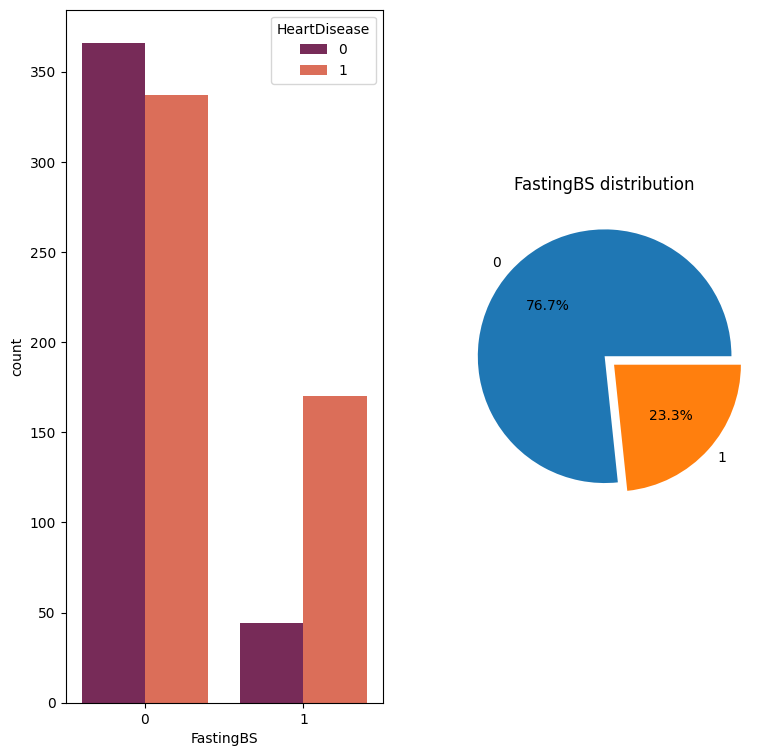

In [ ]:
fasting_bs = df["FastingBS"].value_counts()
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
sns.countplot(x="FastingBS", data=df, hue="HeartDisease",palette = "rocket")

plt.subplot(1,2,2)
plt.pie(fasting_bs, labels=fasting_bs.index, autopct='%1.1f%%', explode=(0,0.1))
plt.title("FastingBS distribution")

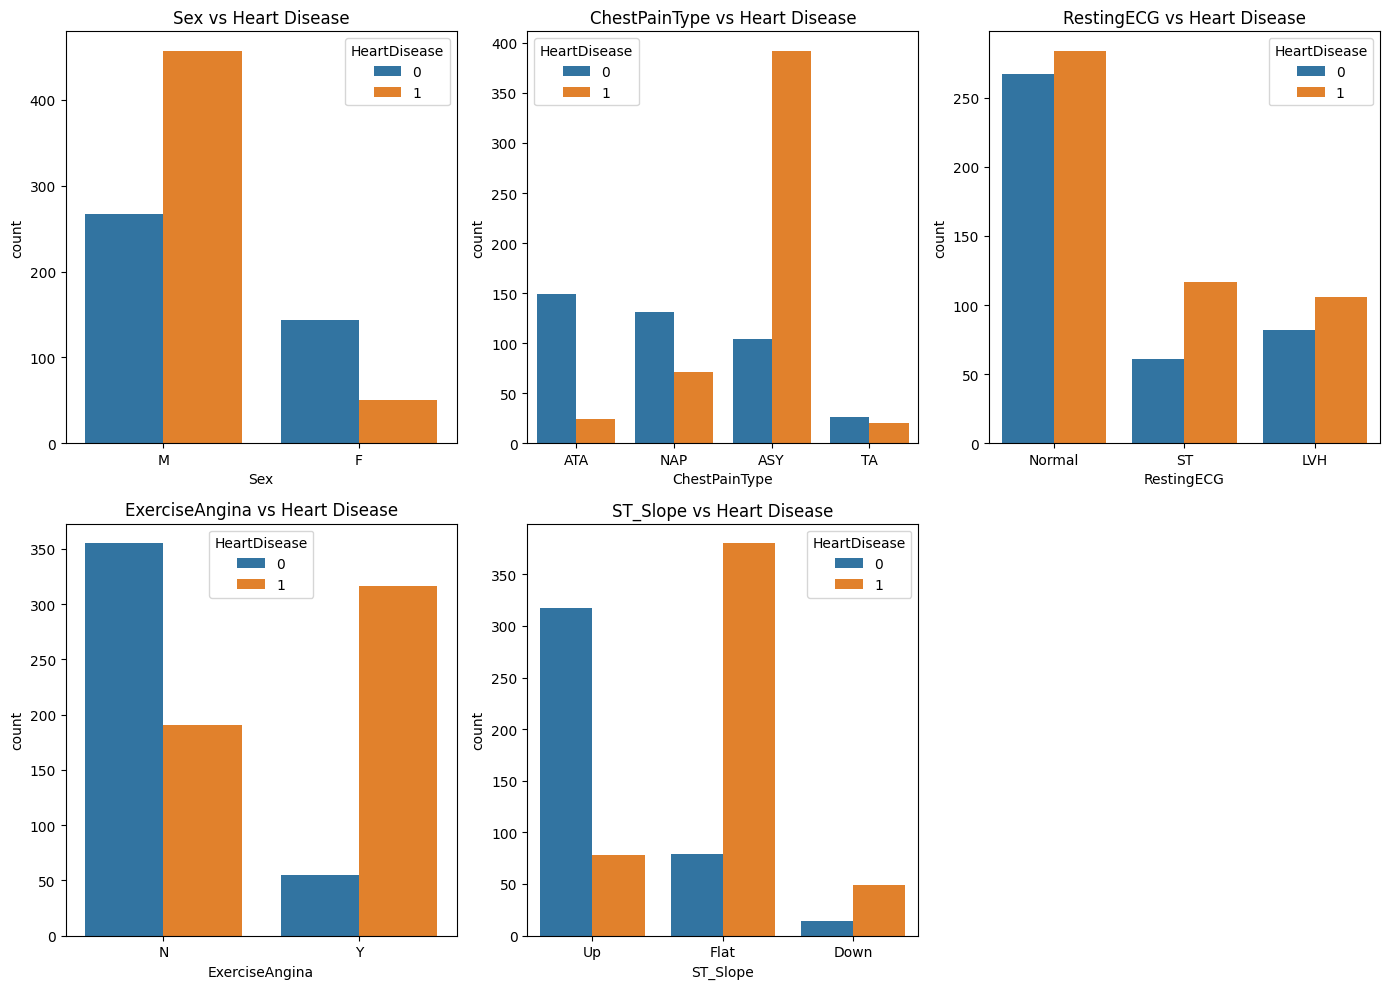

In [ ]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
plt.figure(figsize=(14,10))
for i, col in enumerate(categorical_cols, 1):
  plt.subplot(2,3,i)
  sns.countplot(x=col, hue="HeartDisease", data=df)
  plt.title(f"{col} vs Heart Disease")

plt.tight_layout()
plt.show()

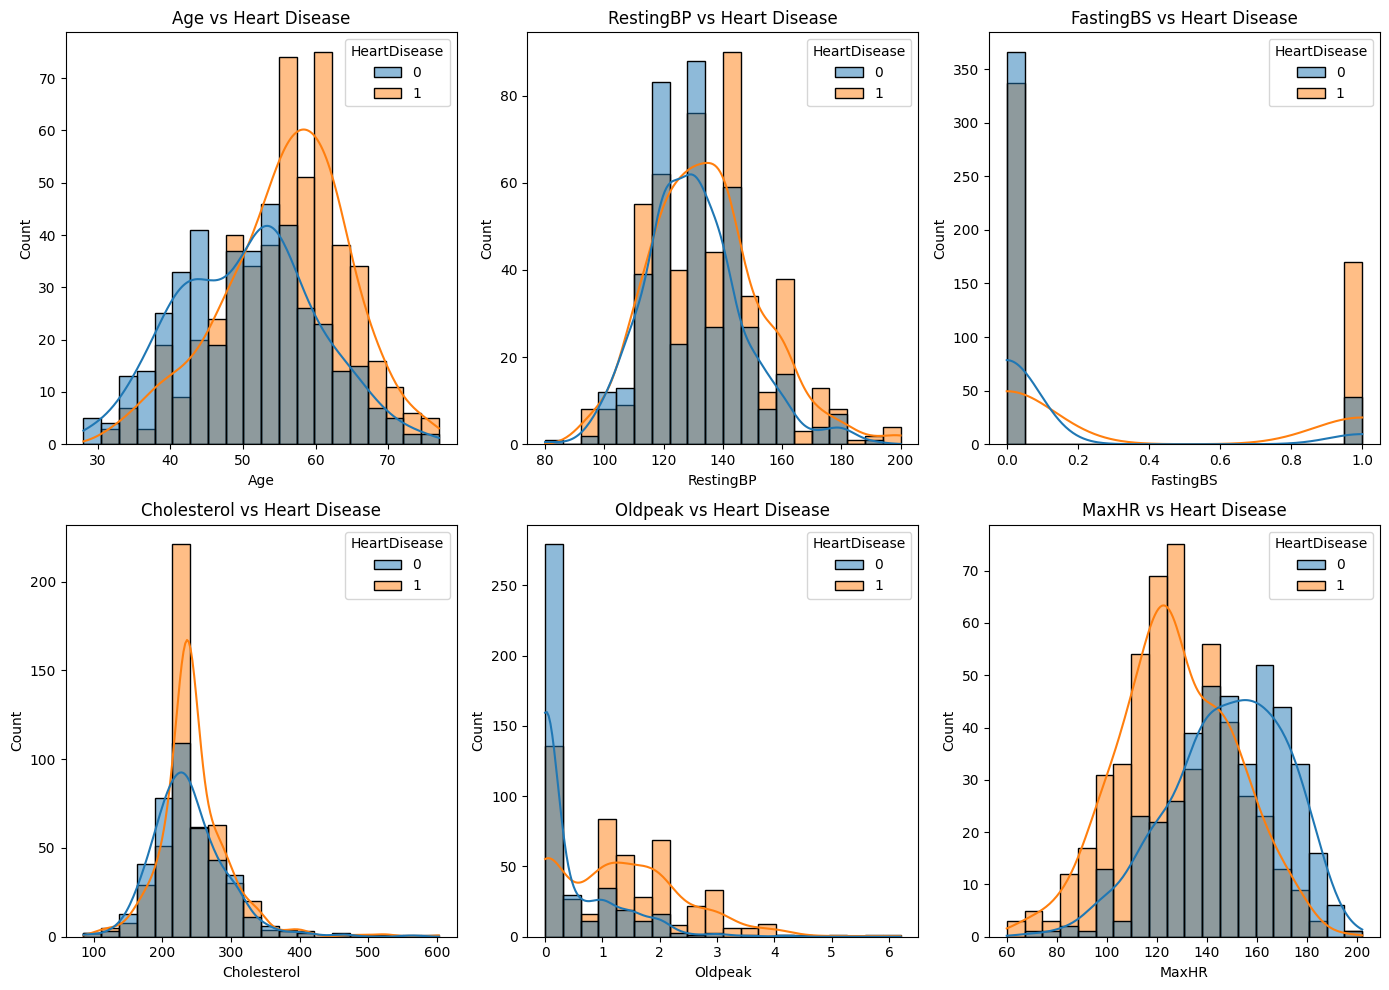

In [ ]:
numerical_cols = ['Age', 'RestingBP','FastingBS', 'Cholesterol', 'Oldpeak', 'MaxHR']
plt.figure(figsize=(14,10))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(2,3,i)
  sns.histplot(x=col, hue="HeartDisease", data=df, bins=20, kde=True)
  plt.title(f"{col} vs Heart Disease")

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289.0,0,1,172,0,0.0,2
1,49,0,2,160,180.0,0,1,156,0,1.0,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2
3,48,0,0,138,214.0,0,1,108,1,1.5,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264.0,0,1,132,0,1.2,1
914,68,1,0,144,193.0,1,1,141,0,3.4,1
915,57,1,0,130,131.0,0,1,115,1,1.2,1
916,57,0,1,130,236.0,0,0,174,0,0.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
continuous_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_cols = ['FastingBS']

scaler= ColumnTransformer([("standard scaler", StandardScaler(), continuous_cols)], remainder="passthrough")

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.842391304347826


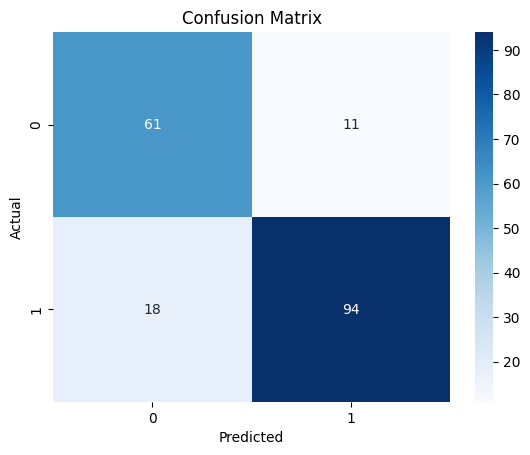

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        72
           1       0.90      0.84      0.87       112

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

